In [4]:
import librosa
import librosa.display
from python_speech_features import mfcc
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn import metrics
from sklearn.metrics import classification_report
import os
from pydub import AudioSegment

In [5]:
classes = ["blues", "hiphop", "metal", "pop"]

In [6]:
for i in range (len (classes)):
    d = "data/" + classes[i]
    j = 0
    for file in os.listdir(d):
        name1 = d + "/" + file
        if (j < 80):
            name2 = "data2/" + classes[i] + "/" + file
        else:
            name2 = "data3/" + classes[i] + "/" + file
        audio = AudioSegment.from_file(name1)
        audio2 = audio[0:29000]
        audio2.export(name2, format="wav")
        j = j + 1

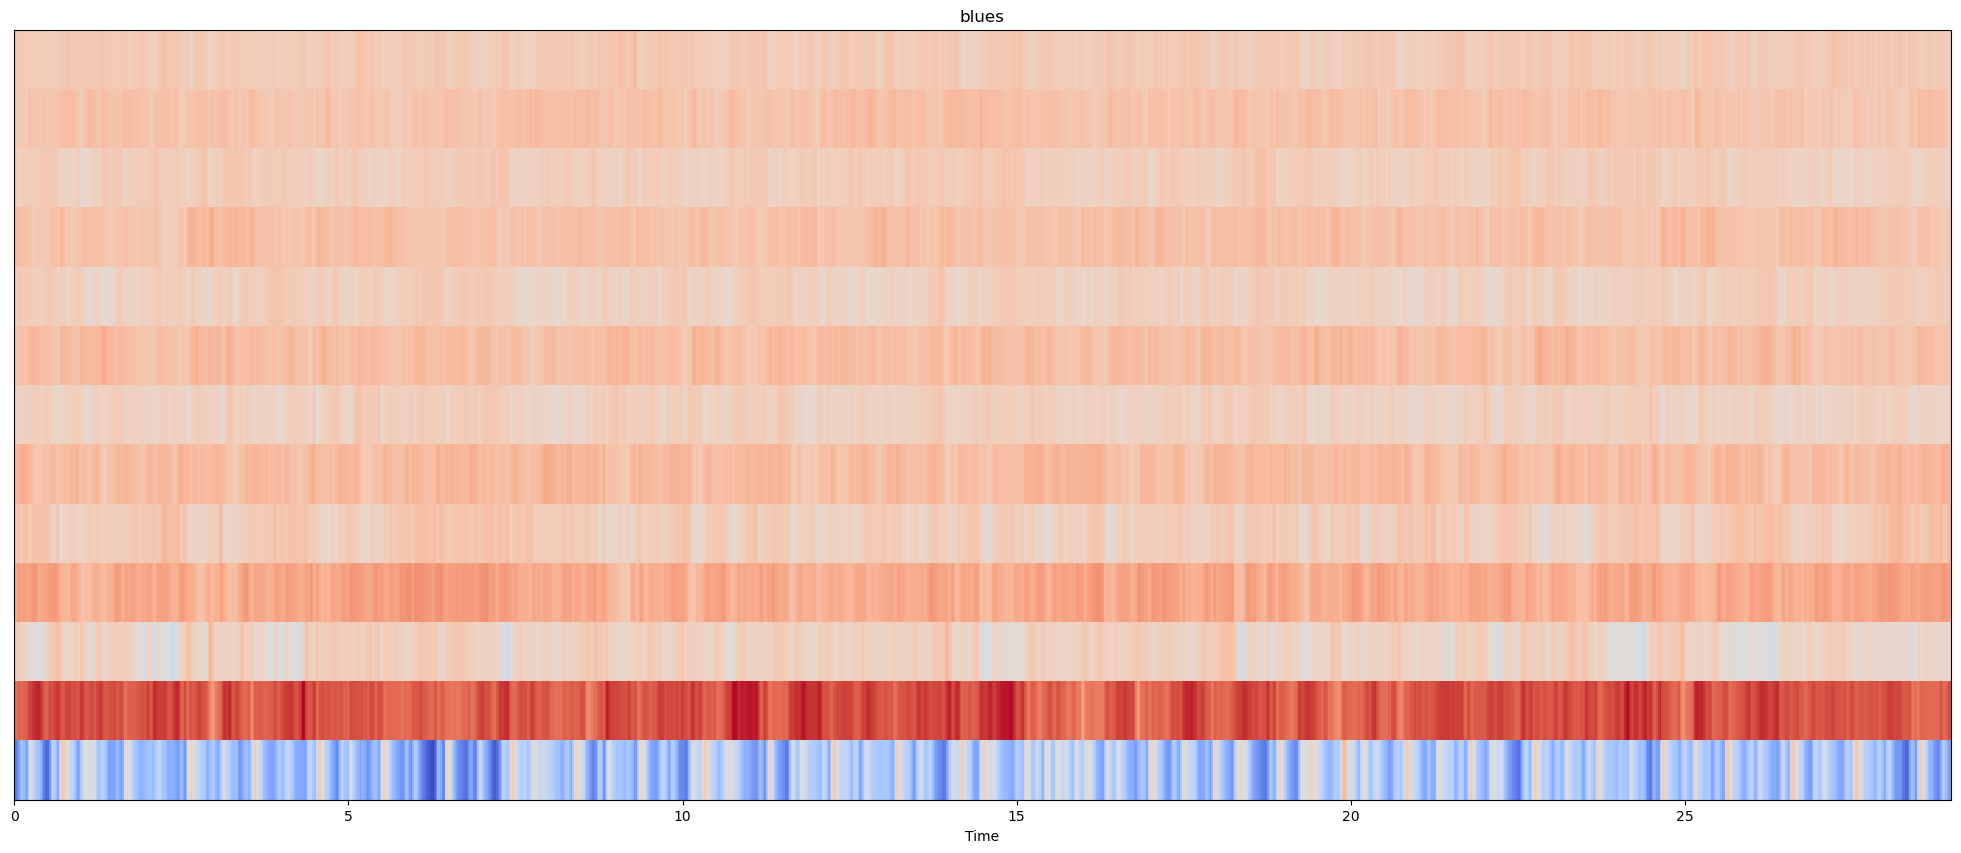

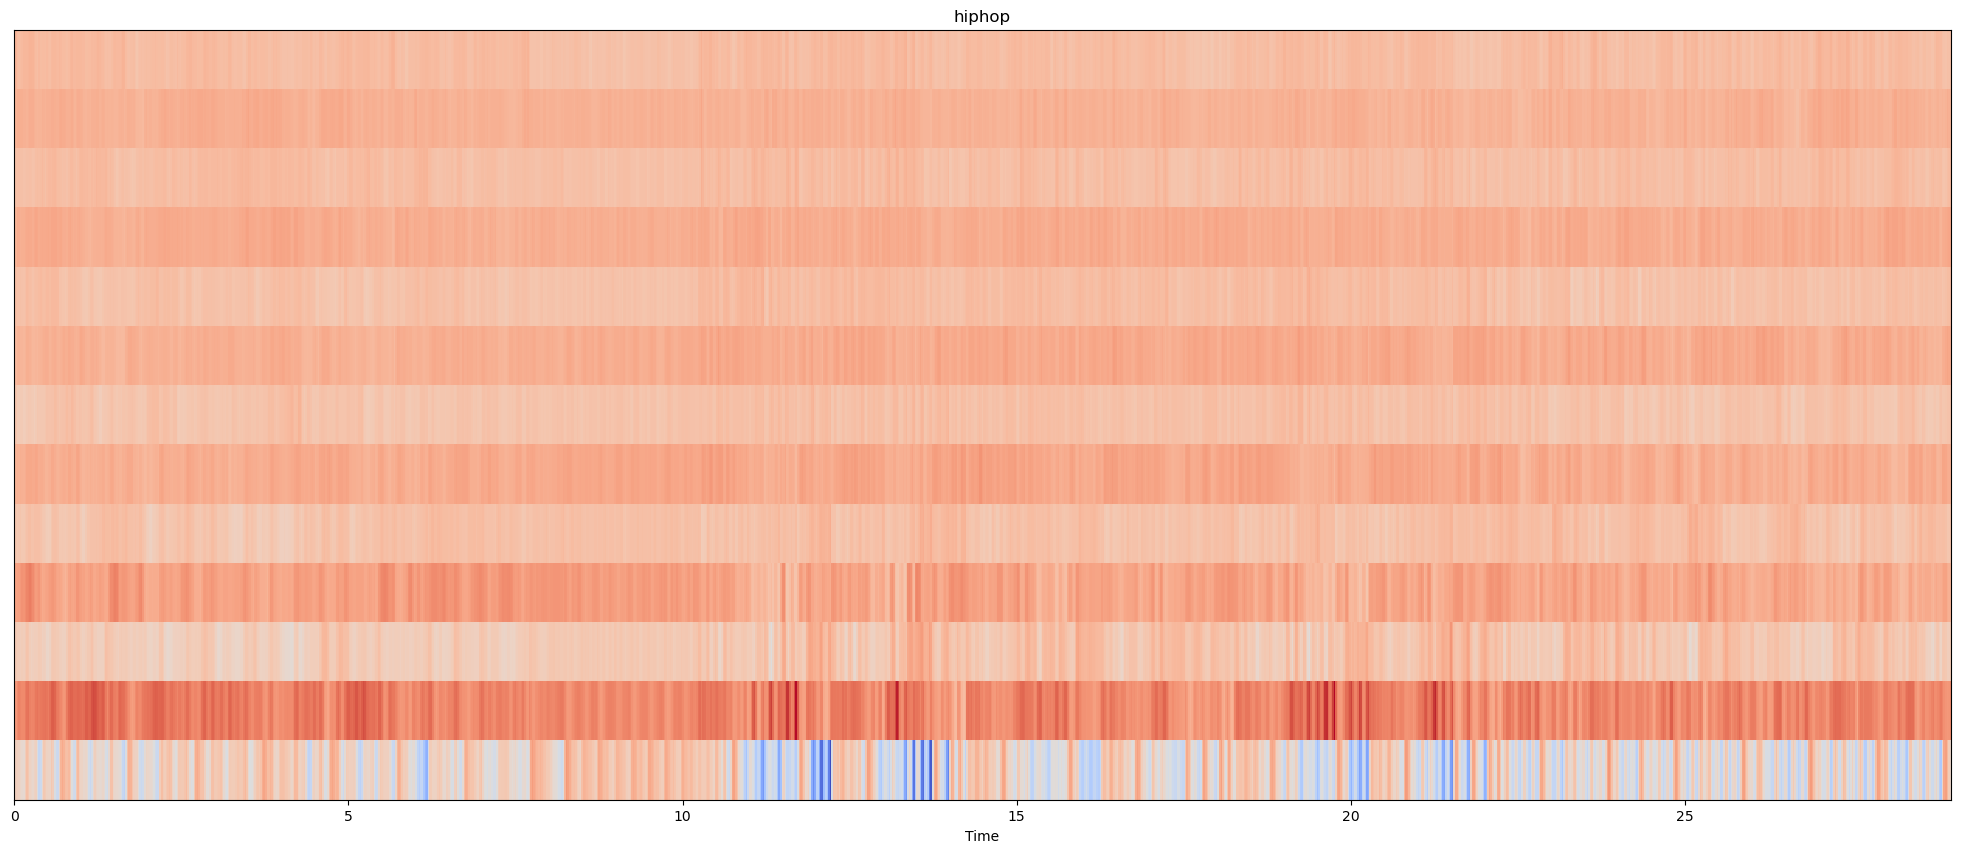

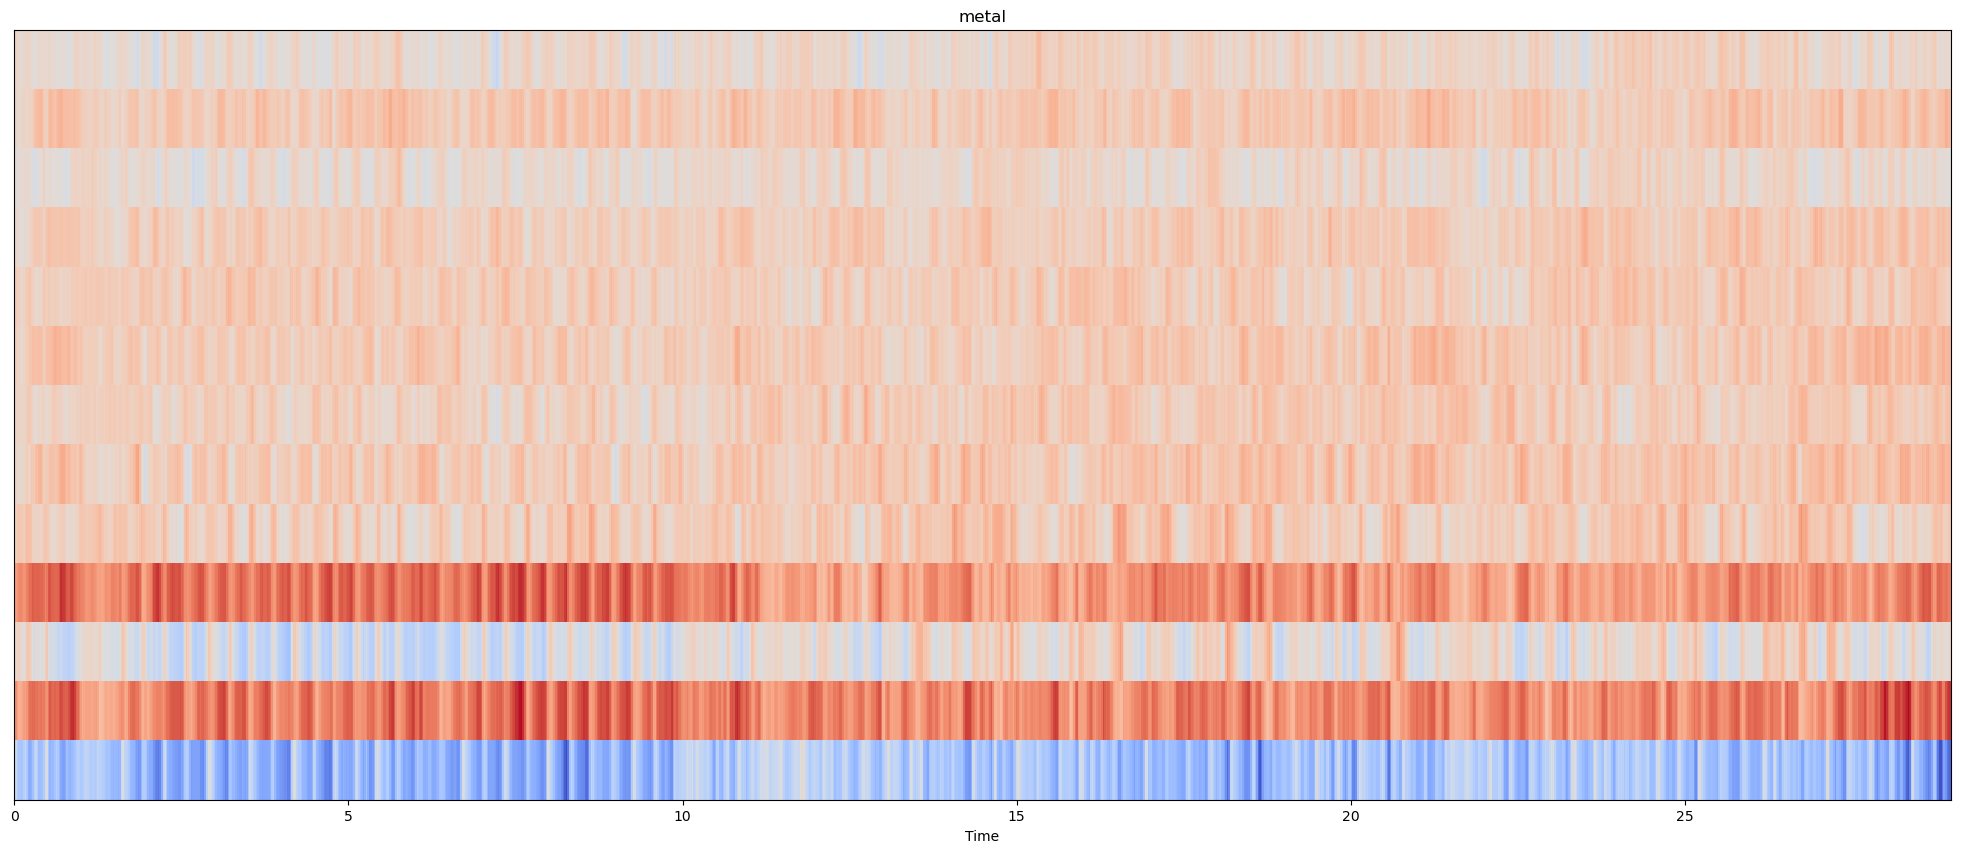

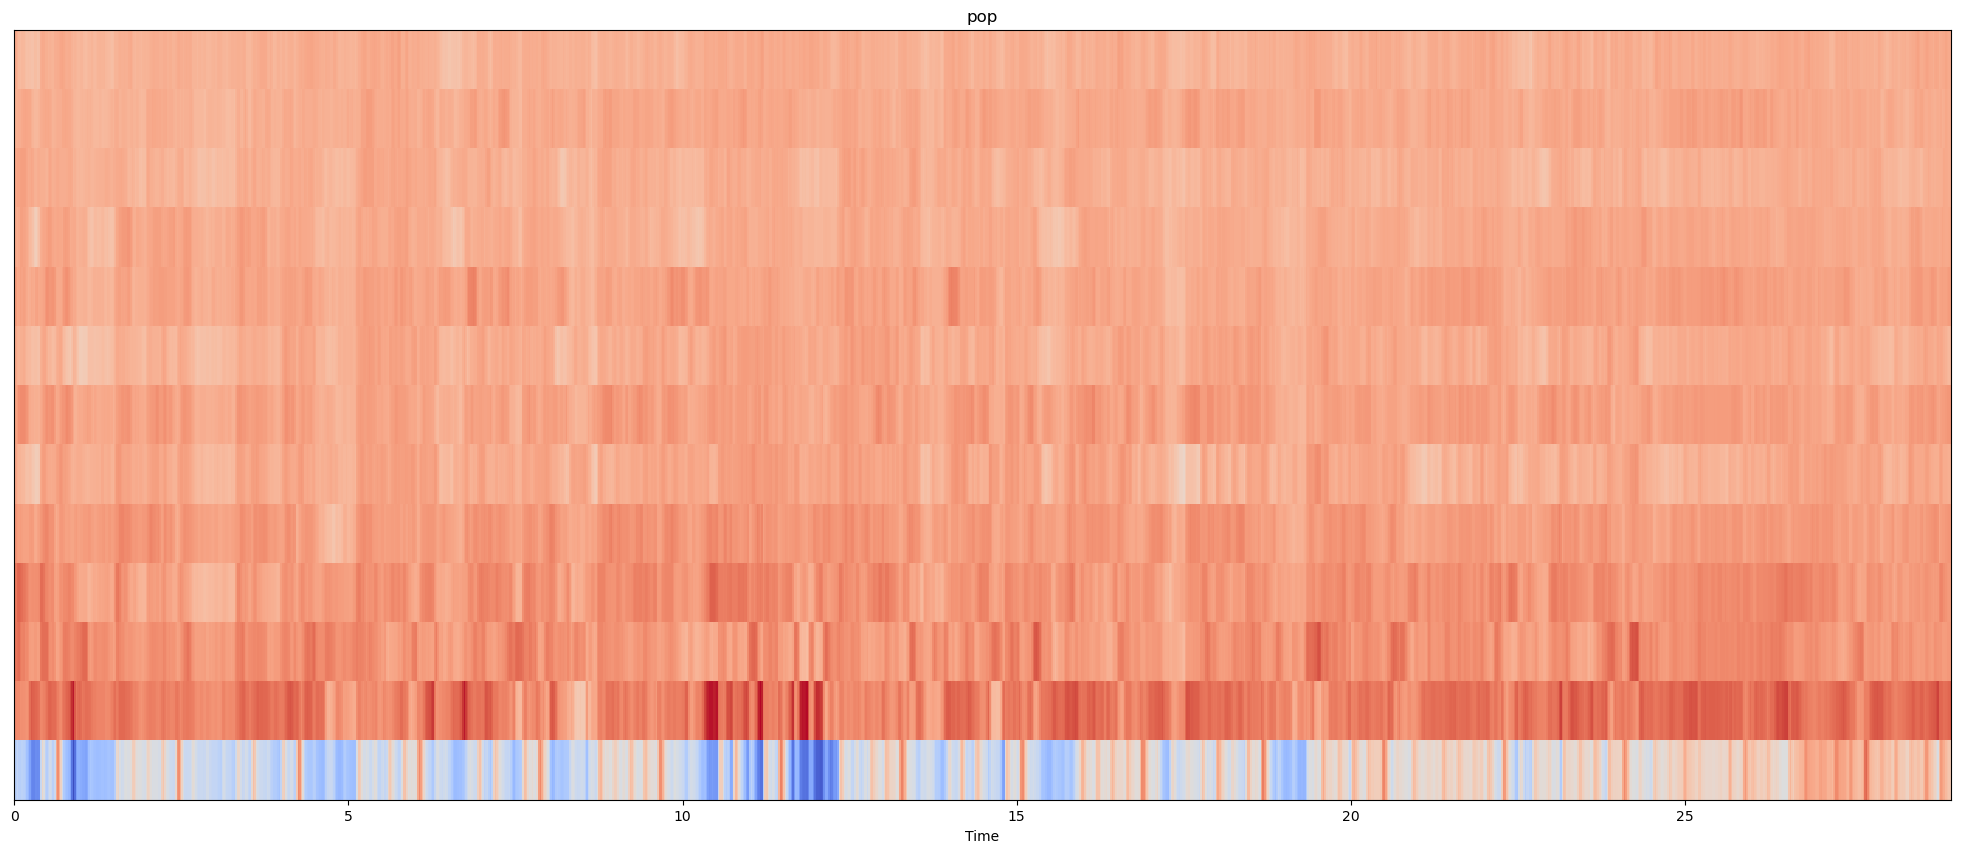

In [7]:
for i in range (len (classes)):
    audio_file = "data2/" + classes[i] + "/" + classes[i] + ".00000.wav"
    signal, sr = librosa.load (audio_file)
    mfcc1 = librosa.feature.mfcc (y = signal, n_mfcc = 13, sr = sr)
    plt.figure (figsize = (25, 10))
    librosa.display.specshow (mfcc1, x_axis = "time", sr = sr)
    plt.title (classes[i])
    plt.show ()

In [13]:
class hmm_model:
    def __init__ (self, components):
        self.models = []
        self.model = hmm.GaussianHMM (n_components = components, n_iter = 500)
        
    def train (self, data):
        np.seterr (all = "ignore")
        fit_data = self.model.fit (data)
        self.models.append (fit_data)
    
    def get_score (self, data):
        return self.model.score (data)

In [14]:
models = []
data = np.array ([])
for i in range (len (classes)):
    d = "data2/" + classes[i]
    for file in os.listdir(d):
        name = d + "/" + file
        f, a = wavfile.read (name)
        m = mfcc (a, f)
        
        if (len (data) == 0):
            data = m
        else:
            data = np.append (data, m, axis = 0)

    model = hmm_model (4)
    model.train (data)
    models.append ([model, classes[i]])
    model = None

In [15]:
r = []
p = []
model = None
for i in range (len (classes)):
    d = "data3/" + classes[i]
    for file in os.listdir(d):
        name = d + "/" + file
        f, a = wavfile.read (name)
        m = mfcc (a, f)
        max_score = float ("-inf")
        for j in range (len(models)):
            model, g = models[j]
            score = model.get_score (m)
            if (max_score < score):
                max_score = score
                result = g
        r.append (classes[i])
        p.append (result)

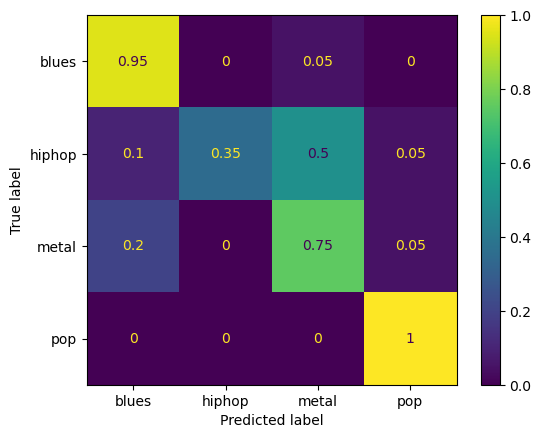

In [16]:
confusion_matrix = metrics.confusion_matrix(r, p)

confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]

cm_plot = metrics.ConfusionMatrixDisplay (confusion_matrix = confusion_matrix, display_labels = classes)

cm_plot.plot()
plt.show()

In [17]:
print(classification_report(r, p, target_names = classes))

              precision    recall  f1-score   support

       blues       0.76      0.95      0.84        20
      hiphop       1.00      0.35      0.52        20
       metal       0.58      0.75      0.65        20
         pop       0.91      1.00      0.95        20

    accuracy                           0.76        80
   macro avg       0.81      0.76      0.74        80
weighted avg       0.81      0.76      0.74        80



For better analyze we should consider f1-score and precision or recall is not enough.

## Questions

### Part 1

1- Because if the lengths aren't same the features can be different

2- it can help for preserving time information and it can help mfcc to preserve time features and changing. It can help for decreasing boundary effects and increasing accuracy.

3- It is traditional and there are some reasons: It can help to reduce dimension and helps in computation. Most important informations are in these numbers of features. It can also provide robust.

### Part 2

1- States are hidden states that we can't see them and we want to find them. Obsevations are somthings that we can see them and base on them we want to find states. Here states are genres and observations are mfcc features.

2- In first-order HMM current states only depends on the previous state. This model is one of the HO-HMM models and other models can depend on more states.

3- This model is good for time sequential data and it can find temporal patterns like audios. Becaues it analyzes state that base on previous state so time can effect here.

4- Advantages: It can provide a probabilistic representation of time sequences - It is good for time series data - It is good in language processing and pattern recognation.
Disadvantages: It has limits for complex problems and temporal complexities - Initial parameters and initial values can effect it - The computations can be complex.

5- Continuous HMM: It has continuous observations - Gaussian Mixture Model HMM: Each state emission probability is modeled as a mixture of gaussian distributions - Hidden Semi-Markov Model - Factorial HMM - Coupled HMM

### Part 3

We have four groups in prediction: TP: true positive - TN: true negetive - FP: false positive - FN: false negetive </br>
Accuracy = (TN + TP) / (TN + FP + TP + FN) </br>
Precision = TP / (TP + FP) </br>
Recall = TP / (TP + FN) </br>
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

1- Accuracy represents the number of correctly classified data instances over the total number of data instances. </br>
Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances. </br>
Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. </br>
F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test.

2- Precision just considers TP and FP and recall just considers TP and FN. We need to consider FP and FN with each other. For example if we predict all wrong predictions in just FP or FN with large numbers precision or recall will high but our model is not good.

3- F1 score utilizes the harmonic mean. It provides a balanced assessment between precision and recall. It gives more weight to lower values. It is important here because it is more responsive to changes when one of the values is significantly lower than the other.

4- Multi-class metrics are evaluation measures used to assess the performance of machine learning models in scenarios where there are more than two classes. </br>
Macro-average: Calculates metrics independently for each class and then averages them. </br>
Micro-average: Computes metrics globally by considering all classes jointly. </br>
Weighted-average: Computes the average of metrics weighted by the number of instances in each class.

The first model is more accurate because the way that first model is implemented is different from the seccond model way. For example in forward backward algorithm for calculating alpha and beta the first model uses faster and more accurate solution. Pre processing can effect too. In first model pre processing can use to reduce noise and make all data same and more usefull.